<a href="https://colab.research.google.com/github/kushagraSingh100/Computer-vision/blob/main/yolo_v8_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import Image

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.3/616.3 kB 9.6 MB/s eta 0:00:00


In [3]:
import ultralytics

In [4]:
ultralytics.checks()

Ultralytics YOLOv8.0.176 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [5]:
import os

In [6]:
HOME = os.getcwd()

In [7]:
print(HOME)

/content


In [8]:
!mkdir {HOME}/datasets

In [9]:
%cd {HOME}/datasets

/content/datasets


In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="udHh5VeQJzrVqfO8RfYc")
project = rf.workspace("humanoidnao").project("street-obstacles-ull1r")
dataset = project.version(5).download("yolov5")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Street-Obstacles-5 in yolov5pytorch:: 100%|██████████| 376/376 [00:00<00:00, 6478.65it/s]


In [11]:
%cd {HOME}

/content


In [13]:
!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 save=True

Ultralytics YOLOv8.0.176 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/Street-Obstacles-5/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

In [15]:
!ls /content/runs/segment/train2

args.yaml					    MaskR_curve.png
BoxF1_curve.png					    results.csv
BoxP_curve.png					    results.png
BoxPR_curve.png					    train_batch0.jpg
BoxR_curve.png					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2.jpg
confusion_matrix.png				    train_batch440.jpg
events.out.tfevents.1694538391.31670924f9d3.1752.0  train_batch441.jpg
labels_correlogram.jpg				    train_batch442.jpg
labels.jpg					    val_batch0_labels.jpg
MaskF1_curve.png				    val_batch0_pred.jpg
MaskP_curve.png					    weights
MaskPR_curve.png


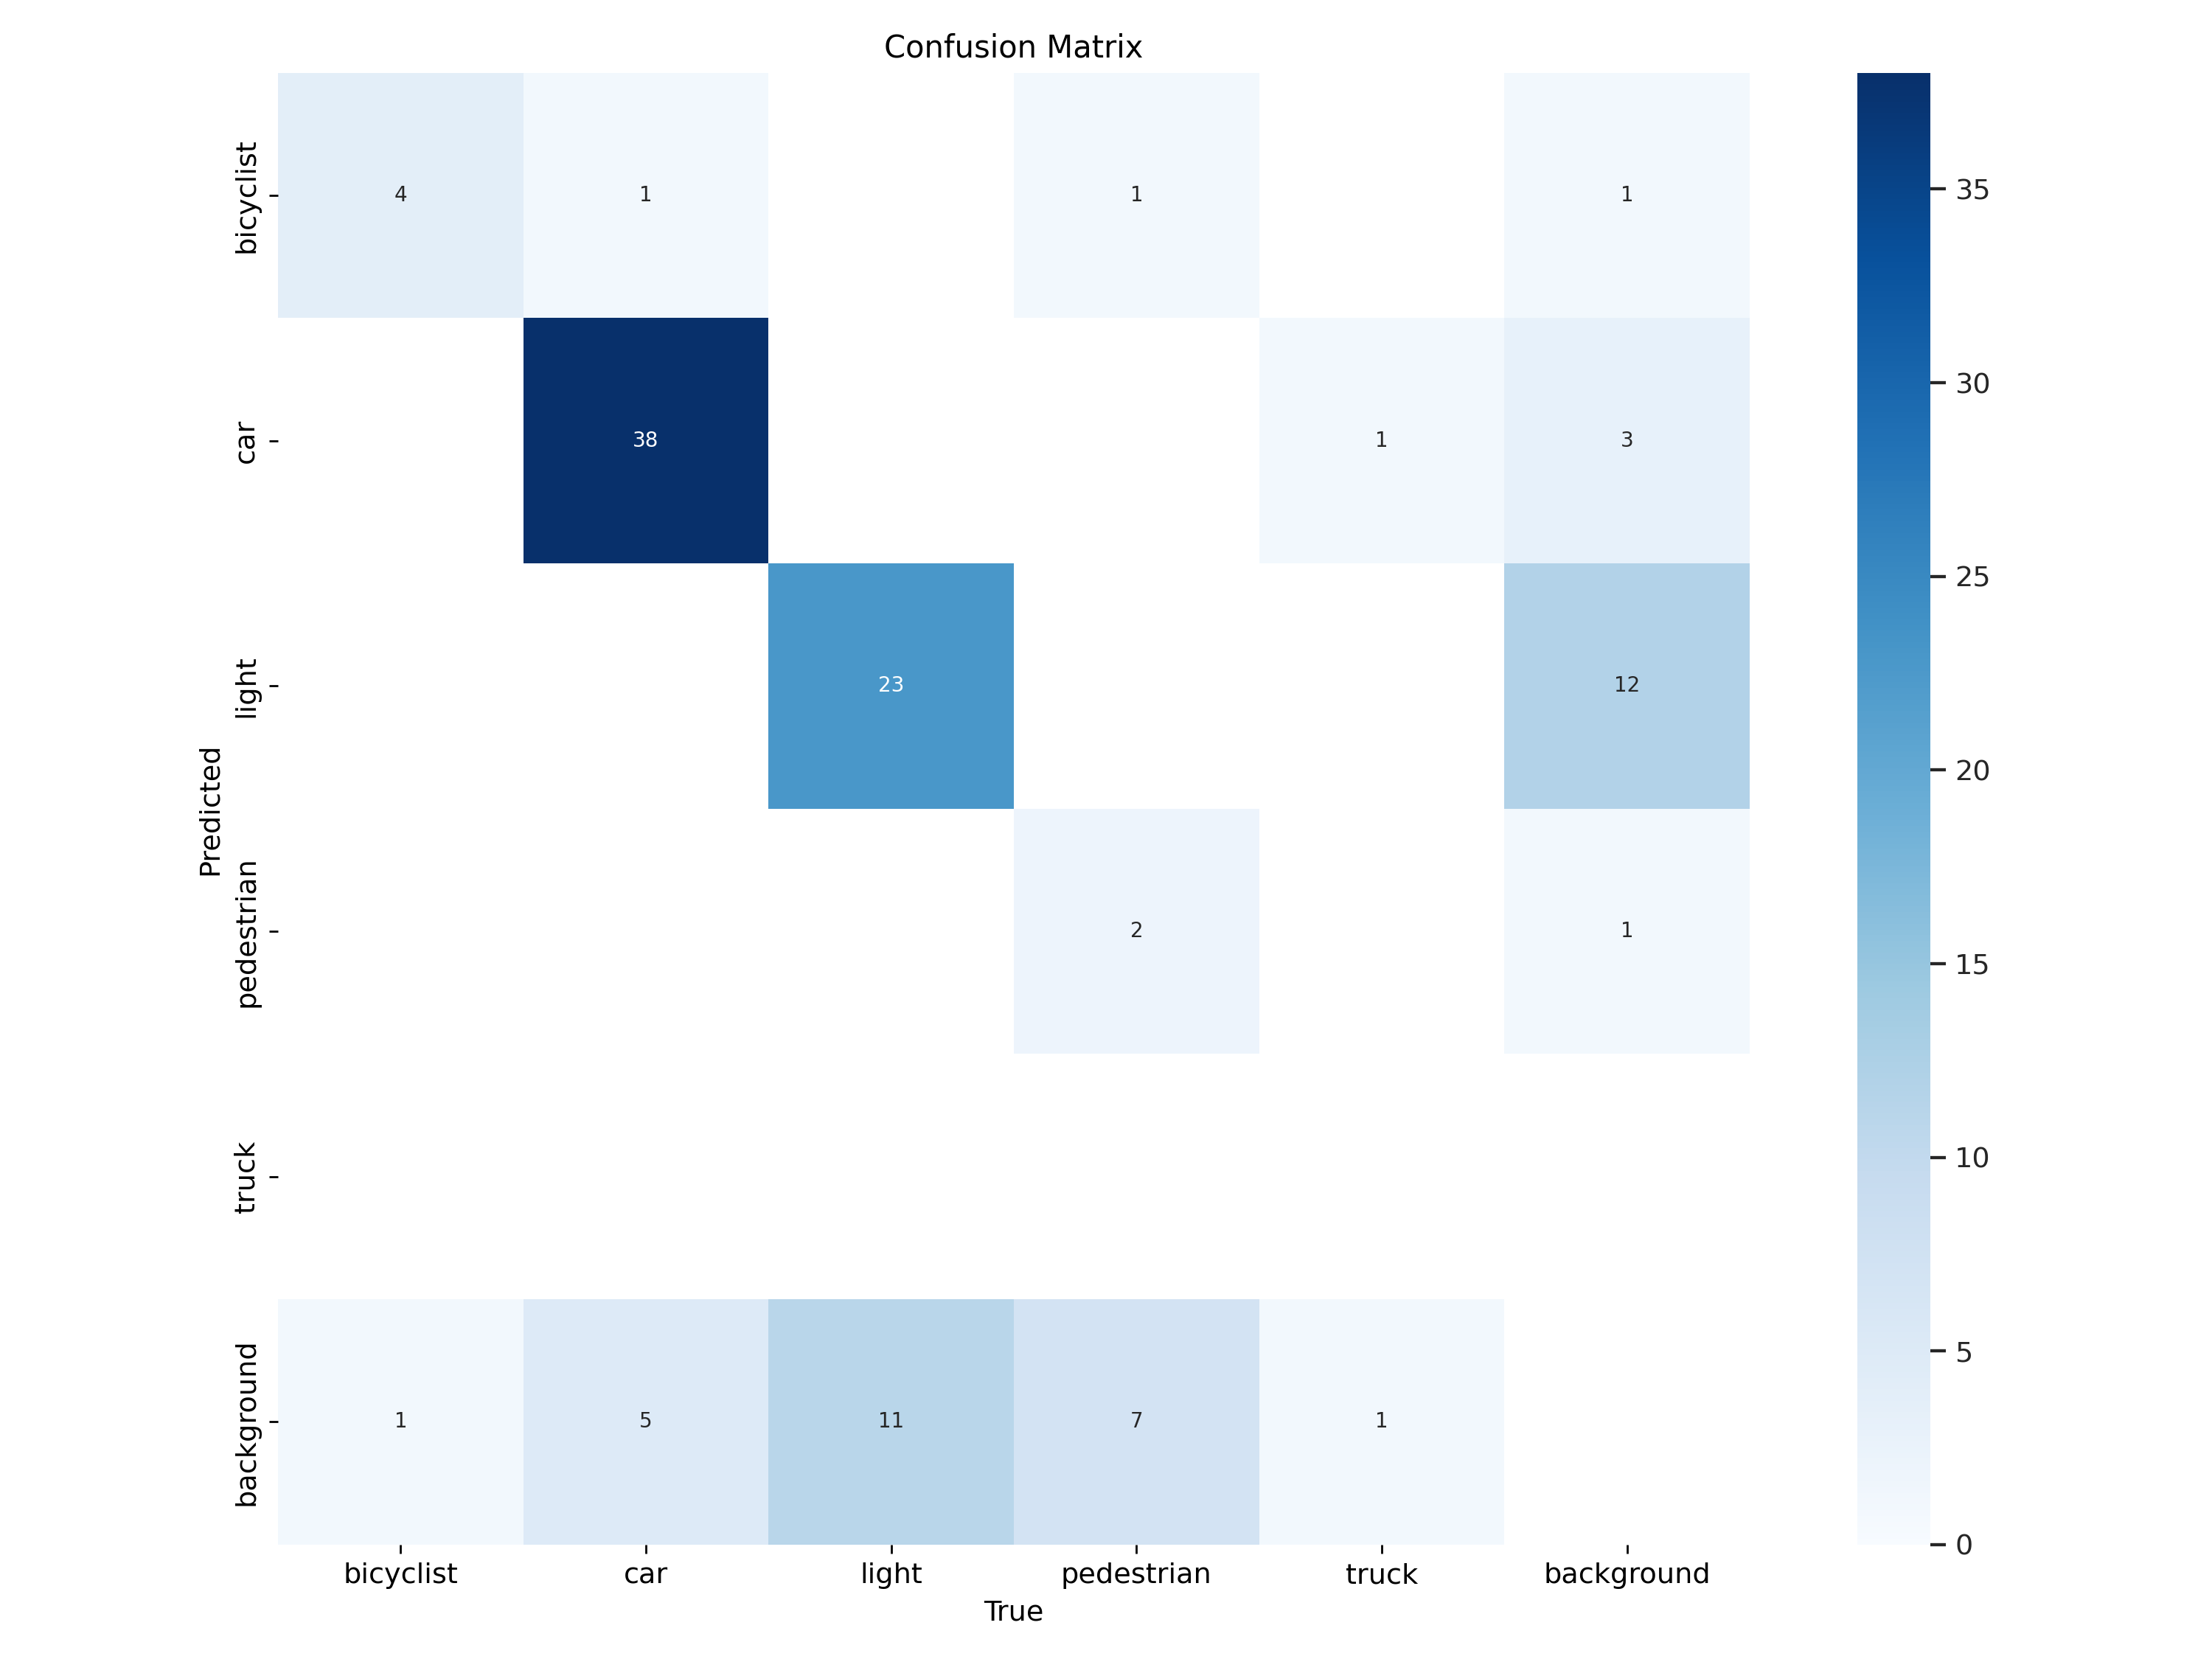

In [17]:
Image(f'/content/runs/segment/train2/confusion_matrix.png',width = 900)

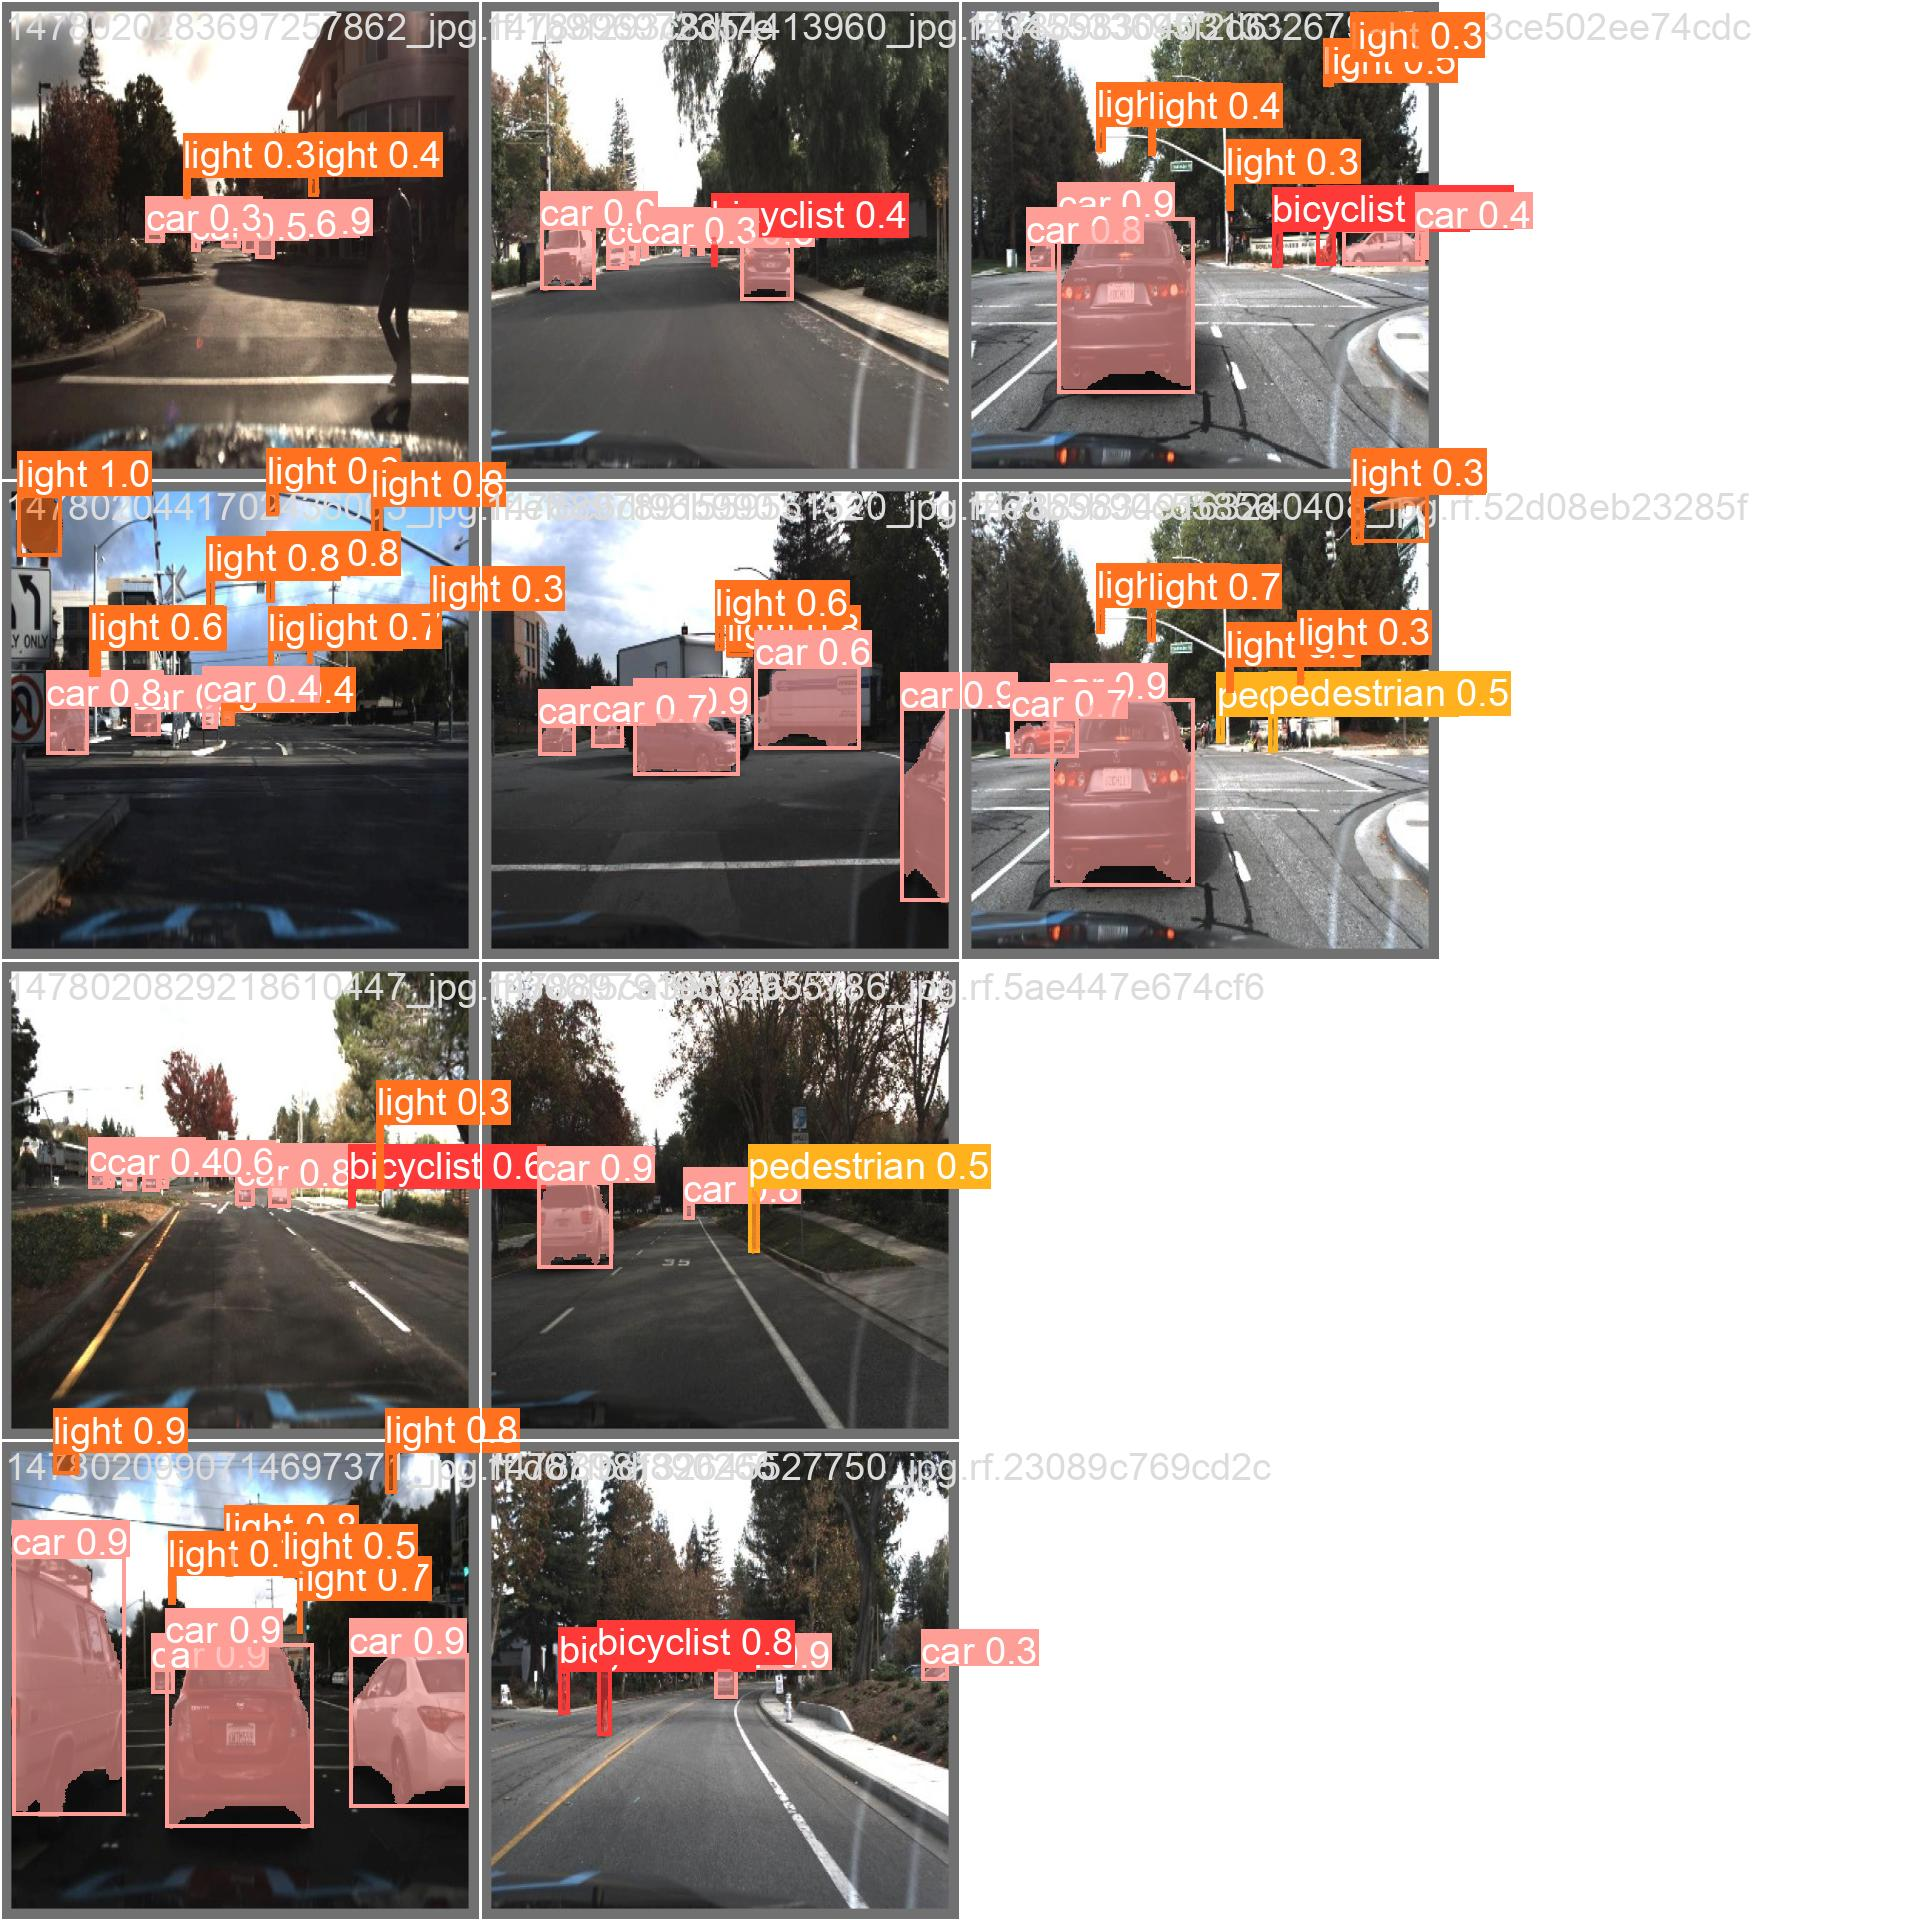

In [20]:
Image(f'/content/runs/segment/train2/val_batch0_pred.jpg',width = 1500)

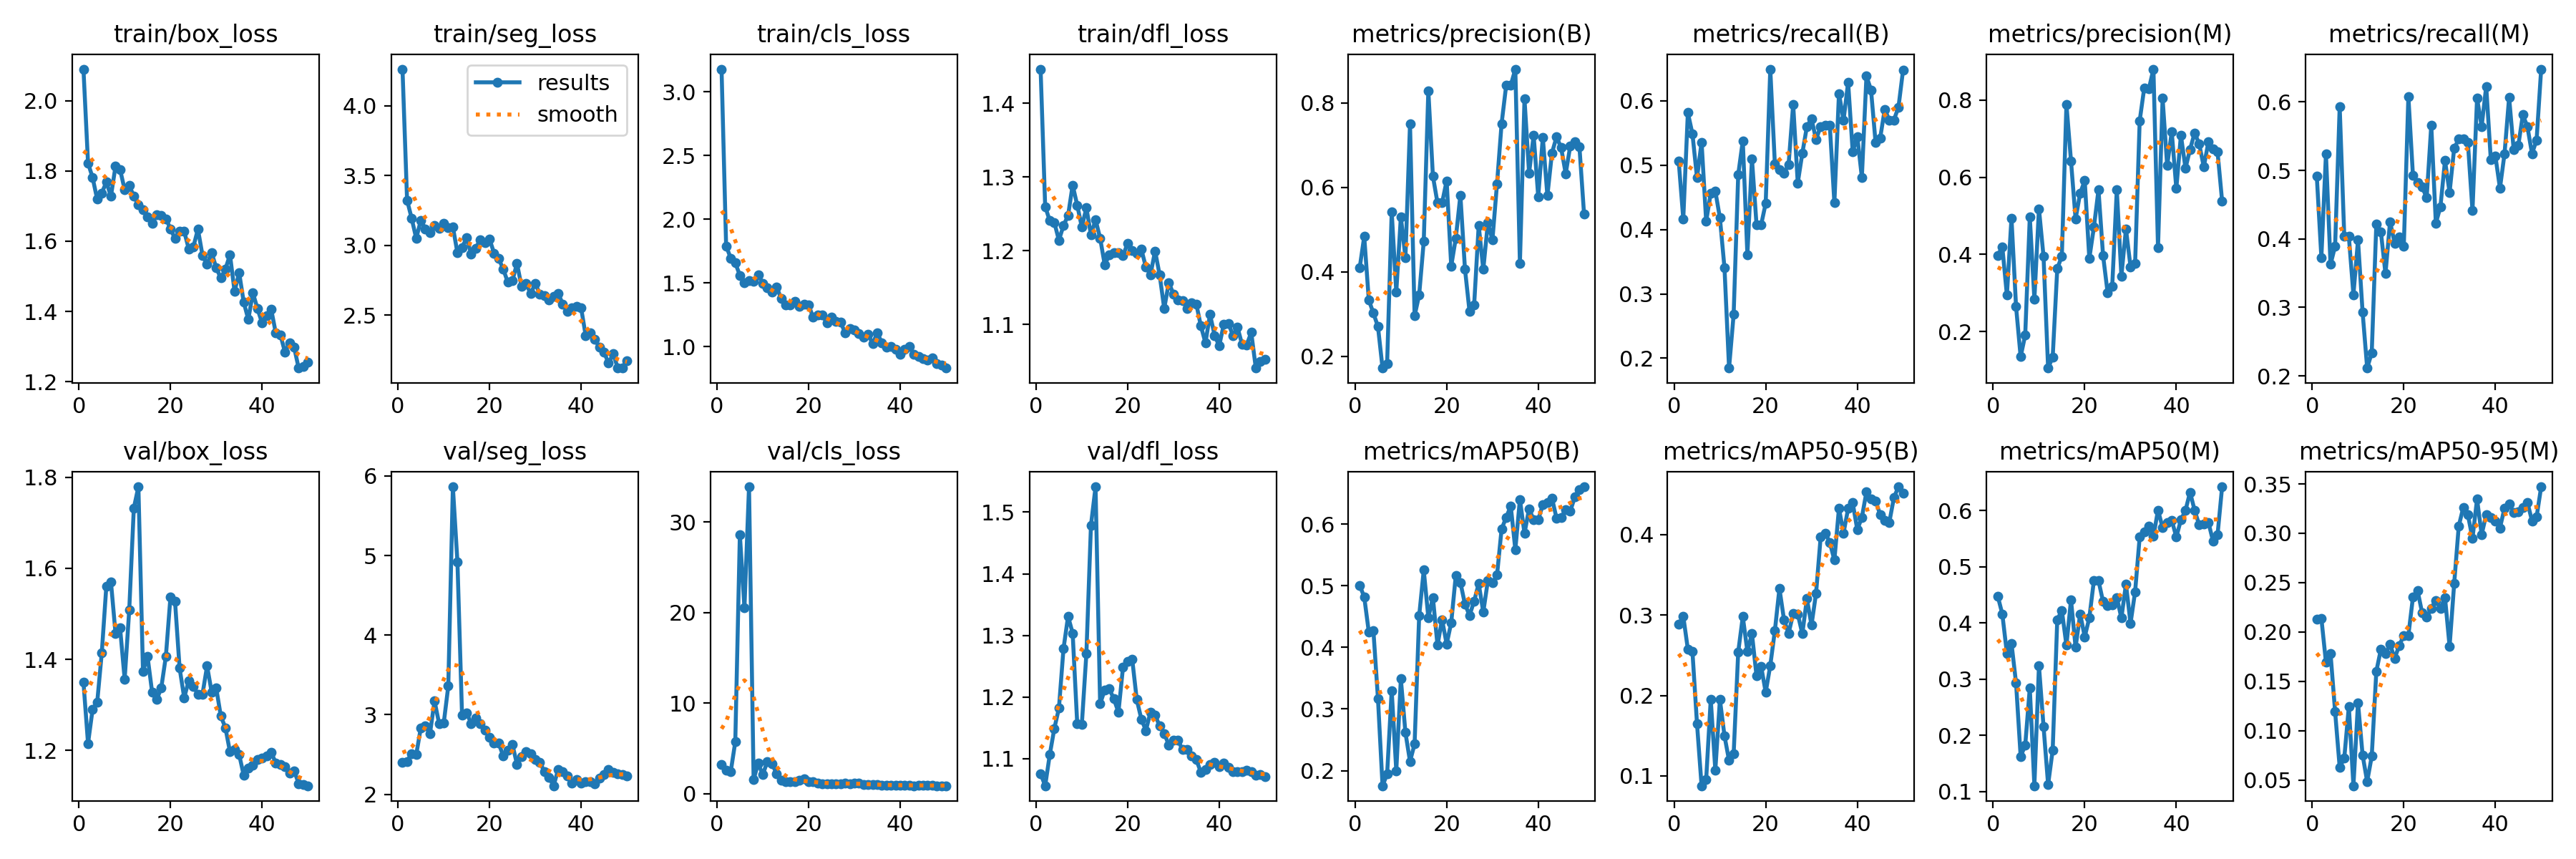

In [21]:
Image(f'/content/runs/segment/train2/results.png',width = 900)

In [29]:
!yolo task=segment mode=val model=/content/runs/segment/train2/weights/best.pt data=/content/datasets/Street-Obstacles-5/data.yaml

Ultralytics YOLOv8.0.176 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27225279 parameters, 0 gradients
val: Scanning /content/datasets/Street-Obstacles-5/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.74it/s]
                   all         10         95      0.543      0.648      0.662      0.451      0.502      0.616      0.612      0.326
             bicyclist         10          5      0.426        0.8      0.571      0.413      0.426        0.8      0.554      0.178
                   car         10         44       0.81      0.864      0.915      0.654       0.81      0.864      0.901      0.557
                 light         10         34      0.534      0.676      0.643      0.433      0.488      0.618      0.592      0.286


In [24]:
!yolo task=segment mode=predict model=/content/runs/segment/train2/weights/best.pt source=/content/datasets/Street-Obstacles-5/test/images

Ultralytics YOLOv8.0.176 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27225279 parameters, 0 gradients

image 1/5 /content/datasets/Street-Obstacles-5/test/images/1478020295192032509_jpg.rf.2531579549dbb472a91fdeb1b16bfd60.jpg: 640x640 4 cars, 2 lights, 45.8ms
image 2/5 /content/datasets/Street-Obstacles-5/test/images/1478897873278313934_jpg.rf.c49ca57d50d66af8357123fcf4f04f01.jpg: 640x640 7 cars, 4 lights, 1 truck, 40.4ms
image 3/5 /content/datasets/Street-Obstacles-5/test/images/1478898125788372518_jpg.rf.00e79c3b6e15e211c741df582c5b3456.jpg: 640x640 3 cars, 40.5ms
image 4/5 /content/datasets/Street-Obstacles-5/test/images/1478898188059118868_jpg.rf.66185a866634daa2fd659722689eb759.jpg: 640x640 1 bicyclist, 3 cars, 12 pedestrians, 40.4ms
image 5/5 /content/datasets/Street-Obstacles-5/test/images/1478898311458260916_jpg.rf.7569420828fb30cafb8f8acd55c32629.jpg: 640x640 2 bicyclists, 4 cars, 7 lights, 34.7ms
Speed: 1.7ms preproc

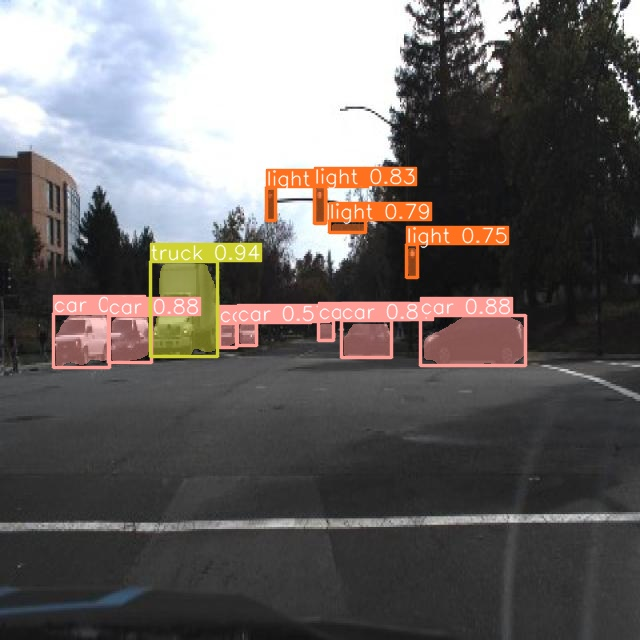

In [27]:
Image('/content/runs/segment/predict/1478897873278313934_jpg.rf.c49ca57d50d66af8357123fcf4f04f01.jpg')

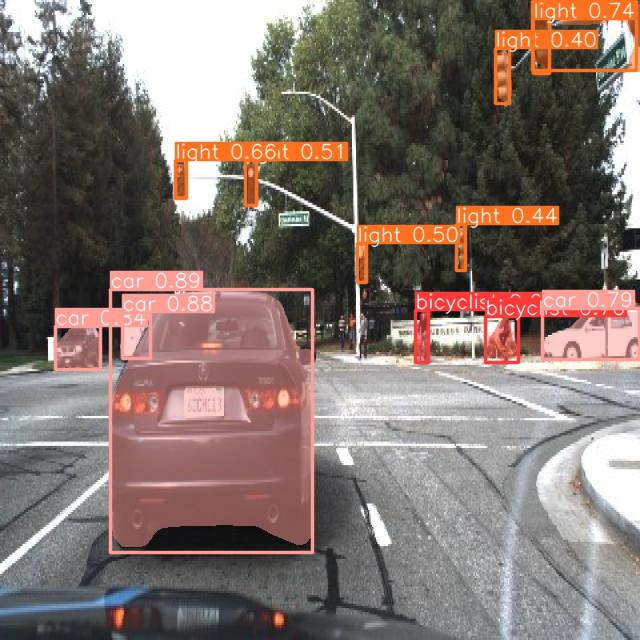

In [28]:
Image('/content/runs/segment/predict/1478898311458260916_jpg.rf.7569420828fb30cafb8f8acd55c32629.jpg')